In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import timeit

In [7]:
def deterministic_census():
    p=0.5 #walking right
    q=1-p #walking left
    lifetime = []
    for i in range(1,21):
        l=np.zeros(22)
        death_probability=0
        l[i]=1
        l_prime=np.zeros(22)
        t=1
        mean_lifetime=0
        while death_probability<=0.99999 :
            for j in range(1,21):
                l_prime[j-1]=l_prime[j-1]+l[j]*q
                l_prime[j+1]=l_prime[j+1]+l[j]*p
            mean_lifetime=mean_lifetime+((l_prime[0]+l_prime[21])*t)    
            death_probability=death_probability+(l_prime[0]+l_prime[21])
            l=l_prime
            l[0]=0
            l[21]=0
            l_prime=np.zeros(22)
            t=t+1
        lifetime.append(mean_lifetime)
    return lifetime

In [8]:
start=timeit.default_timer()
life=deterministic_census()
stop=timeit.default_timer()
print('creation time :',stop-start) 

creation time : 0.5576720999997633


Text(0, 0.5, 'mean lifetime')

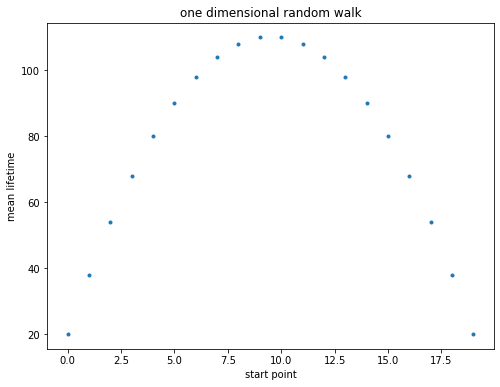

In [9]:
L=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
fig = plt.figure(figsize=(8,6))
plt.plot(L,life,'.')
plt.title('one dimensional random walk')
plt.xlabel('start point')
plt.ylabel('mean lifetime')